In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def human_format(x):
    sigpart = 0
    suffix = ""
    if x < .01:
        return "{:.0e}".format(x)
    if x < 1:
        return "{:.2f}".format(x)
    if x < 1000:
        return "{:.3g}".format(x)
    elif x < 1000000:
        sigpart = x / 1000
        suffix = "k"
    elif x < 1000000000:
        sigpart = x / 1000000
        suffix = "M"
    else:
        sigpart = x / 1000000000
        suffix = "B"
    return "{:.3g}{}".format(sigpart, suffix)

In [3]:
def plot_data(filter_data, throughput_data, title):
    f, axs = plt.subplots(1,2, figsize=(6,3))

    ax = axs[0]
    index = ['Simple','Markov','Racz','MaxEnt']
    filter_data = [d / filter_data[0] for d in filter_data]
    data = {'amount': filter_data}
    trans = pd.DataFrame(data=data,index=index)

    #Plot and label
    my_plot = trans.plot(ax=ax, kind='bar', stacked=True, legend=None)
    ax.set_ylabel('Fraction of queries hit')
    ax.set_xlabel('Cascade Stage')
    ax.set_xticklabels(labels=index, rotation='-45')
    ax.yaxis.grid(True)
    
    pos_offset = 0.05
    loop = 0
    for i, row in trans.iterrows():
        y = row['amount'] + pos_offset
        my_plot.annotate("{:,.3f}".format(np.absolute(row['amount'])),(loop,y),ha="center")
        loop += 1
    my_plot.set_ylim(ymax=1.2)

    ### Throughput ###
    ax = axs[1]
    index = ['Baseline','+Simple','+Markov','+Racz']
    data = {'amount': throughput_data}
    trans = pd.DataFrame(data=data,index=index)

    trans.plot(ax=ax, kind='bar', legend=None)
#     ax.set_yscale('log')
    ax.set_ylabel('Throughput (QPS)')
    ax.set_xlabel('Cascade Stage')
    ax.set_xticklabels(labels=index, rotation='-45')
    ax.yaxis.grid(True)

    f.suptitle(title, y=1.02)
    f.tight_layout()
    plt.savefig("cascade_{}_1.pdf".format(title.lower()), bbox_inches='tight')
    plt.show()
    
def plot_data_2(throughput_data, time_data, title):
    f, axs = plt.subplots(1,2, figsize=(6,3))
    
    ax = axs[0]
    index = ['Overall','Simple','Markov','Moment','MaxEnt']
    data = {'amount': throughput_data}
    trans = pd.DataFrame(data=data,index=index)

    trans.plot(ax=ax, kind='bar', legend=None)
    ax.set_yscale('log')
    ax.set_ylabel('Stage throughput (QPS)')
    ax.set_xlabel('Cascade Stage')
    ax.set_xticklabels(labels=index, rotation='-45')
    ax.yaxis.grid(True)

    ### Time ###
    ax = axs[1]
    index = ['Simple','Markov','Moment','MaxEnt']
    data = {'amount': time_data}
    trans = pd.DataFrame(data=data,index=index)
    
    my_plot = trans.plot(ax=ax, kind='bar', stacked=True, legend=None)
    ax.set_yscale('log')
    ax.set_ylabel('Fraction of time spent')
    ax.set_xlabel('Cascade Stage')
    ax.set_xticklabels(labels=index, rotation='-45')
    ax.yaxis.grid(True)
    pos_offset = 1.2
    loop = 0
    for i, row in trans.iterrows():
        y = row['amount'] * pos_offset
        my_plot.annotate("{:,.3f}".format(np.absolute(row['amount'])),(loop,y),ha="center")
        loop += 1
    my_plot.set_ylim(ymax=3)
    
    f.suptitle(title, y=1.02)
    f.tight_layout()
    plt.savefig("cascade_{}_2.pdf".format(title.lower()), bbox_inches='tight')
    plt.show()

In [6]:
def plot_data_3(create_times, merge_times, query_times, title):
    f, axs = plt.subplots(1,1, figsize=(6,2.4))
    ax = axs
    x = range(5)
    index = ['?', 'Baseline', '+Simple', '+Markov', '+RTT', 'Merge12']
    
#     p1 = plt.bar(x, create_times, color='b')
    p2 = plt.bar(x, merge_times, width=0.5, color='C0')
    p3 = plt.bar(x, query_times, width=0.5, bottom=merge_times, color='C1')
#     ax.set_yscale('log')
    ax.set_ylabel('Runtime (s)')
#     ax.set_xlabel('Sketch')
    ax.set_xticklabels(labels=index, rotation='-45')
    ax.yaxis.grid(True)
    ax.set_xticks(x, index)
    ax.legend((p3[0], p2[0]), ('Estimation', 'Merge'), frameon=False)
    
#     pos_offset = 0.1 * trans['amount'].min()
#     loop = 0
#     for i, row in trans.iterrows():
#         y = row['amount'] + pos_offset
#         my_plot.annotate("{:,.3f}".format(np.absolute(row['amount'])),(loop,y),ha="center")
#         loop += 1
#     plt.set_ylim(ymax=trans['amount'].max() + 5)

    pos_offset = 0.03
    loop = 0
    for i in range(len(merge_times)):
        y = merge_times[i] + query_times[i] + pos_offset
        ax.annotate("{:,.2f}".format(merge_times[i] + query_times[i]),(loop,min(y, 0.9)),ha="center")
        loop += 1
    
    plt.ylim(ymax=1)
#     f.suptitle(title, y=1.02)
    f.tight_layout()
    plt.savefig("sliding_window_milan.pdf", bbox_inches='tight')
    plt.show()

[2.8585279999999997, 2.799337, 2.799916, 2.872201, 3.2525150000000003]
[0.021755, 0.023368, 0.021121, 0.021431, 0.44237600000000005]
[6.282106, 5.2364, 0.054083000000000006, 0.013609999999999999, 0.038357999999999996]


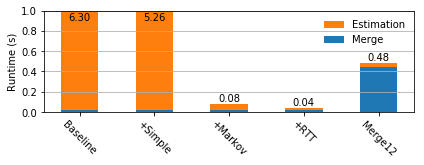

,avg_runtime,avg_querytime,markov_hit,maxent_hit,racz_throughput,avg_createtime,simple,maxent_time,racz_hit,maxent_throughput,avg_mergetime,racz_time,racz,markov_time,simple_throughput,simple_time,simple_hit,markov_throughput,markov,overall_throughput
0,9.247726,6.282106,4297.0,4297.0,Infinity,2.858528,False,0.999949,4297.0,684.097640,0.021755,0.00000,False,0.000000,1.351416e+07,0.000051,4297.0,Infinity,False,684.063012
1,8.143391,5.236400,3630.0,3630.0,Infinity,2.799337,True,0.999928,3630.0,693.326764,0.023368,0.00000,False,0.000000,1.144180e+07,0.000072,4297.0,Infinity,False,820.664303
2,2.944094,0.054083,3630.0,34.0,Infinity,2.799916,True,0.891086,34.0,708.911119,0.021121,0.00000,False,0.105066,2.074604e+07,0.003848,4297.0,641912.376460,True,79835.788037
3,2.973519,0.013610,3630.0,4.0,30629.331085,2.872201,True,0.457231,34.0,656.093737,0.021431,0.08325,True,0.443208,1.975695e+07,0.016311,4297.0,614243.744359,True,322260.431527
4,3.805897,0.038358,NaN,NaN,NaN,3.252515,NaN,NaN,NaN,NaN,0.442376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
results = pd.read_csv("../javamsketch/results/sliding_milan_1519813406.csv")
# cRow = results[(results['simple'] == True) & (results['markov'] == True) & (results['racz'] == True)]
# filter_data = cRow[['simple_hit', 'markov_hit', 'racz_hit', 'maxent_hit']].squeeze().tolist()
# lesion_data = results.loc[:,'overall_throughput'].dropna().tolist()
# throughput_data = cRow[['overall_throughput', 'simple_throughput', 'markov_throughput', 'racz_throughput', 'maxent_throughput']].squeeze().tolist()
# throughput_data = [float(t) for t in throughput_data]
# time_data = cRow[['simple_time', 'markov_time', 'racz_time', 'maxent_time']].squeeze().tolist()
# plot_data(filter_data, lesion_data, "milan")
# plot_data_2(throughput_data, time_data, "milan")

create_times = results.loc[:,'avg_createtime'].dropna().tolist()
merge_times = results.loc[:,'avg_mergetime'].dropna().tolist()
query_times = results.loc[:,'avg_querytime'].dropna().tolist()

print(create_times)
print(merge_times)
print(query_times)

plot_data_3(create_times, merge_times, query_times, "Sliding window runtime: milan")

results